In [292]:
from vk_group import VKGroup 
from urlextract import URLExtract
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from post_processing import PostProcessor
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We have previously downloaded posts using the VKGroup class, which is described in the vk_group module. The class is based on the VK API. This class includes a method that allows extracting post texts from VK groups. To use this class, an access token is required.

## First, let's throw out some of the posts:

We want to throw out posts, since each request costs money, and we would not like to waste it on processing advertising or empty posts.
- Let's remove posts without text 
- We will delete posts with links, as advertising assumes their presence. Non-advertising posts with links can also be deleted (but there are less than 100 
of them).
- We also need to throw out duplicate posts
- Let's throw out posts that are too long (if you look at the distribution by length, it's clear that most posts are no longer than 3000)
- Let's throw out posts that are too short, they are not informative for our task (shorter than 15 characters)

To do this, we use the PostProcessor class from the post_processing module.


The PostProcessor class is designed for preprocessing datasets containing textual posts. It offers several key functionalities:

- Removing empty posts: Deletes rows where the post text is missing.
- Removing posts with links: Detects and removes posts that contain URLs.
- Removing duplicates: Identifies and removes duplicate posts.
- Filtering by length: Filters posts based on a specified minimum and maximum number of characters.
The class allows for a customizable preprocessing pipeline by specifying which steps to perform. It works by applying different cleaning methods to a pandas DataFrame.


### Fortunately, the size of the dataset was not affected much ( 16314 -> 13013)


Dataset size befor preprocessing: 16314
None


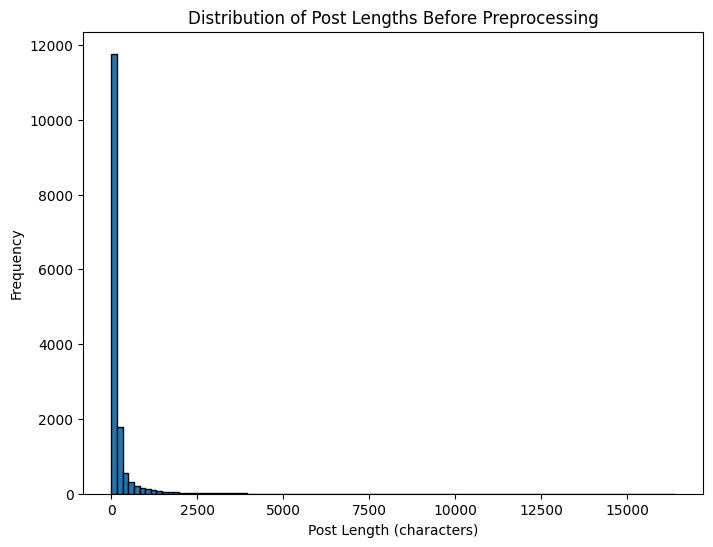

In [300]:
path_to_data = os.getcwd() + "/dataset/dataset.csv"
data = pd.read_csv(path_to_data, header=None, names=["posts"])

data_size = len(data)
print(print(f"Dataset size befor preprocessing: {data_size}"))


post_lengths = data['posts'].dropna().apply(len)

plt.figure(figsize=(8, 6))
plt.hist(post_lengths, bins=100, edgecolor='black')

plt.title('Distribution of Post Lengths Before Preprocessing')
plt.xlabel('Post Length (characters)')
plt.ylabel('Frequency')

plt.show()

In [298]:
preprocessor = PostProcessor(data, post_column='posts', min_length=15, max_length=300)

processed_data = preprocessor.preprocess()
processed_data_size = len(processed_data)
print(f"Dataset size after preprocessing: {processed_data_size }")

Number of empty posts removed: 902
Number of posts removed that contained links: 92
Number of duplicate posts removed: 49
Number of posts removed by length filter: 2258
Dataset size after preprocessing: 13013


Text(0, 0.5, 'Frequency')

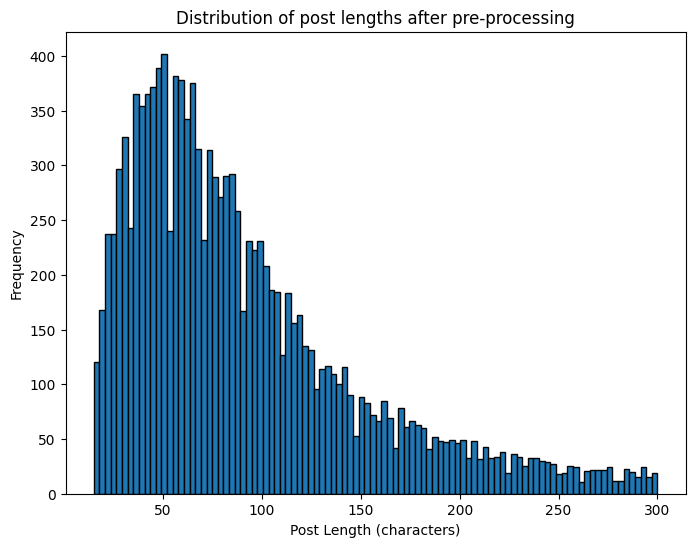

In [297]:
plt.figure(figsize=(8, 6))
plt.hist(processed_data["post_length"], bins=100, edgecolor='black')


plt.title("Distribution of post lengths after pre-processing")
plt.xlabel('Post Length (characters)')
plt.ylabel('Frequency')